<Center> 
    <h1> M5366: Datamining II - Final Project </h1>
    <h3>Dr. Scott Cook</h3>
    <h2>Using Neural Network to Train Self-Driving Car</h2>
    <h3> Tu A. Nguyen </h3>
    
</Center>

# I. Abstract

Inspired by biological processes, neural network is considered as one of the best universal estimator for datamining and machine learning. In 2015, [DeepMind](https://deepmind.com/) published a research paper that describe a system called deep Q-network (DQN). DQN uses neural network to train computer program to play Atari 2600 games. In this project, we seek to develop a self-driving car using DQN. We use computer simulation to train  an agent to navigate a car though a 2D environment. The car has a set of distance sensors that provides the agent with the information about the environment. The main task is to avoid crashing into the objects in the environment. After training, the agent was able to navigate through both static and dynamic environment without crashing. 

# II. Background

## 1. Artificial Neural Network (ANN)

An ANN consists of a sets of artificual neuron connected together. The input signals are processed by these neuron collectively in order to produce the output signals. As the ANN learn by changing the weights between neurons as it recieved feedback data during the trainning process. 

<img src="imgs/ann.png" alt="ann" style="width: 600px;"/>
[source](https://medium.com/technology-invention-and-more/everything-you-need-to-know-about-artificial-neural-networks-57fac18245a1)


## 2. Q-learning

In order to understand Q-learning, we need to first understand Markov Decision Process (MDP).

### Markov Decision Process (MDP)

MDP is a framework to find the best sequence of actions to perform when the outcome of each action is non-deterministic. In this case, the non-determinism must be $1^{st}$ order Markov which means that given the present state, the future states are independent from the past states.

$$P(s^{t+1} | s^t, a^t) = P(s^{t+1} | s^t, a^t, s^{t-1}, a^{t-1}, \dots, s^1, a^1, s^0)$$

MDPs Problem is formally defnied as 4-tuples $(S, A, T, R)$, where

- $S$ represents the state space, which is all the possible states

- $A$ represents the action space, which is all the possible actions 

- $T(s, a, s') = P(S_{t+1} = s' | S_t = s, A_t = a), \text{ for some } s, s' \in S \text{ and } a \in A$$

- $R$ represents reward function,

$$R(s, a): (S, A) \rightarrow \mathbb{R}$$


In a MDP problem, a policy ($\pi$) is defined as a mapping from states to actions $\pi: S \rightarrow A$. In other words, any states s in S, $\pi(s)$ will tell us what action the agent should perform. In short, policy can be underststand as the strategy in any given state.


### Q-learning

Q-learning is a reinforecemnt learning technique. The Q-value is defined as the cumulative discounted reward of doing action $a$ in state $s$ and the following the optimal policy. Q-learning uses temporal differences to estimate the value of $Q^*(s,a)$. In particular, an experience (s, a, r, s') provides one data point for the value Q(s,a). Then, the Q-value is updated using the folowing formula. 

![](imgs/qlearning.svg)

[source](https://en.wikipedia.org/wiki/Q-learning)

### Q-learning and The Curse of Dimentionality

In practice, the Q-value of each state $s$ and action $a$ is store in an $n\times m$ table, where $|S| = n$ and $|A| = m$. If the state space and action space are small, the time it takes to estimate all the Q-value in the table would me small. Nonetheless, as the size of the state space and action space grow, the size of the table would grow. Thus, the trainning process will be significantly slower as the state space and action space grows. Furthermore, since Q-learning state space and action space are usually discrete spaces, problem involving continuous data or actions might requires the discretization of the spaces. Another alternative is to use neural network as an estimator for the Q-value. 

# III. Simulation Design

## 1. Environment

- Firstly, our simulation is considered as a **continuous environment** since the data returned by the sensors are real numbers.
- Secondly, this is a **deterministic environment** since for each state the sensors will always return the exact and correct distance values. 
- Thirdly, the environment is also **partially observable**, since the car cannot see the whole environment using its sensors. 
- Lastly, in this project we will have both **statics and dynamics environment**.

## 2. Agent

The goal of reinforcement learning is to train an agent to autonomously make decision. In particular, an agent is a computer program that

- Gather information about an environment, and
- Takes actions autonomously based on that information

Each agent has 6 components action space (A), percept space (O), state space (S), world dynamics (T), perception function (Z), and utility function (U).  

### Action Space (A)

In this project, the action spaces consist of 

- 0 : Turn Left (The car turn $10^\circ$ counter clockwise)
- 1 : Keep Straight
- 2 : Turn Right (The car turn $10^\circ$ clockwise)

![Action Space](imgs/actionspace.png)

### Percept Space (0)

As shown above, the car has a set of 5 sensors. Each of each sensor return a value from 0 to 50. Thus, the percept space can be represented as a tuple

$$\large{(o_0, o_1, o_2, o_3, o_4)}$$

such that $o_i \in \mathbb{R}$ and $ 0 \leq s_i \leq 50$ for all $0 \leq i \leq 4$.

![State Space](imgs/statespace.png)

### State Space (S)

Before inputing into the neural network, we rescale the data from the percept space so that the values have the range from 0 to 1. Thus, the percept space 

the percept space can be represented as a tuple

$$\large{s =  (s_0, s_1, s_2, s_3, s_4)}$$

such that $s_i \in \mathbb{R}$ and $ 0 \leq s_i \leq 1$ for all $0 \leq i \leq 4$.

### Word Dynamics (T) 

In general, word dynamics is defined as 

$$T: S \times A \rightarrow S.$$

In this project, after the agent perfrom each action, the agent will take new sensors readings.

### Perception Function (Z)

In general, perception function is defined as

$$Z: S \rightarrow O$$

In this case, perception function is 

$$f(s) = \frac{s}{50}.$$

The purpose of this perception function is to rescale the input data. 

### Utility Function (U)

In general, ultility function is defined as

$$ U: S \rightarrow  \mathbb{R}.$$

This is a function that assign a value to each states, to indicate the desirability of being in such a state with respect to the agent's task.

In this project, we define the utility function as

$$r(s) = \begin{cases}
-500 & \text{if car crashed}\\
-(50* (\min(s)) ^ 4 + 50 & \text{if car not crashed}
\end{cases}, \text{ where $s = (s_0,s_1,s_2,s_3,s_4)$}$$

Using this utility function, we can punish the agent for crashing the car. On the other hand, the agent will recieve a higher reward if the minimum value of the sensor reading is high. 

# IV. Q-learning implementation

## 1. Neural Network 

We use a neural network structure to estimate the value of $Q(s, a)$. The **input** of the neural network is the scalled reading from the sensor. The neural network has 3 **output**, each corresponding to one of the Q-value for state s and action turning left (0), keep straight (1), and turn right (2). In particular, the following graph describe a general structure for a neural network that estimate the Q-value

<img src="imgs/qann.png" alt="ann" style="width: 600px;"/>

Note that, in the graph above $ s = (s_0, s_1, s_2, s_3, s_4) $.

The activation function for every node except the output node is sigmoid. The output nodes has linear function as the activation function. 

## 2. Experience Replay

Since Q-learning's updates are incremental and do not converge quickly, so multiple passes with the same data could be beneficial. Thus, storing the a finite set of tuples $(s, a, r, s')$ in a buffer and train from a sample of this buffer can help to optimize the training process. When the buffer has reached its max capacity, the new memory will randomly replace the old memory in the buffer. 

## 3. Exploration vs Exploitation 

When trainning the agent, we also need to pay attention to the problem of exploration vs exploitation. 

- Exploration: is to focus on performing the action that maximize Q(s,a)
- Exploitation: is to select a different action from the one that is currently thinks is best

During the early stage of trainning, the agent usually does not have a good estimation for the Q-values. Therefore, exploration will help to update and imrpove the overall estimation. On the other hand, when the agent has a good estimation of the Q-values, it would be better to focus on exploiting the best strategy. In this project, we balance between exploration and exploitation using the $\epsilon$-greedy alogrithm. In particular, for an $\epsilon$ value between 0 and 1,

- the agent selects the greedy action all but $\epsilon$ of the time, and 
- the agent select random action $\epsilon$ of the time.

During our simulation loop, the $\epsilon$ value start at 1, then for every 1000 iterations the new epsilon value is set to be $0.9*\epsilon$. Consequently, the agent will focus on exploration at the begining and gradually move toward exploitation as it has better estimations on the Q-value.

## 4. Trainning Iteration

For each iteration 

- Collect state stata $s$
- Input $s$ into the neural network to get the estimation for the Q-values
- With probability $\epsilon$ choose a random action $a$. Otherwise, select action $a$ that have the corresponding maximum Q-value. 
- Execute action $a$
- Observe the next state $s'$ and reward $r$
- Store the memory tuple $m$: $(s, a, r, s')$ into the buffer $D$
- Take a random set of samples ($M$) from buffer $D$
    - for $m_i \in M$ set:
    
$$y_i = \begin{cases}
r & \text{if car crashed}\\
r + \gamma \max_{a'}Q(s', a')& \text{if car not crashed}
\end{cases}$$

- 
    - train the neural network where the input is $s_i$ and the target output is $y_i$. 

# V. Results

## 1. Static Environment - Train

The trainning usually last about 30 minutes to an hour. In the video bellow, the neural network has 2 hidden layer, both of wich has 30 nodes. 

The size of our buffer is 100

<center> <video width="600" height="500" controls src="videos/train.mp4" /> </center>

## 2. Dynamic Environment - Test

When the car can move in the static environmnent without crasing, we tested the model by putting the car in a dynamic environment. Using the trainned neural network model, the agent can drive the car in a dynamic environmnent confidently.

<center> <video width="600" height="500" controls src="videos/test.mp4" /> </center>

# Appendix

## Code Structure 

## brain.py

The learning algorithm

## fun.py

A helper library that provide general functions

## wall.py

Contain information about the obstacle

## car.py

Contain information about the car

## Sensor.py

Contain information about the sensor

## graphics_train.py


## graphics_test.py

# References

http://robotics.itee.uq.edu.au/~ai/doku.php/wiki/schedule

http://artint.info/html/ArtInt_265.html

https://medium.com/technology-invention-and-more/everything-you-need-to-know-about-artificial-neural-networks-57fac18245a1

https://en.wikipedia.org/wiki/Q-learning

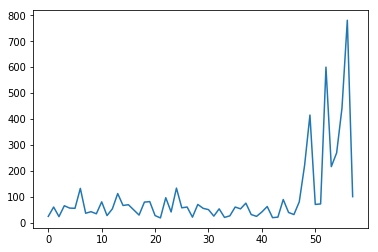

In [3]:
import numpy as np
import matplotlib.pyplot as plt

loop = open('data/loop.txt', 'r')
loop_data = loop.read()
loop_data = loop_data.split('\t')

plt.plot([int(i) for i in loop_data[:-1]])
plt.show()

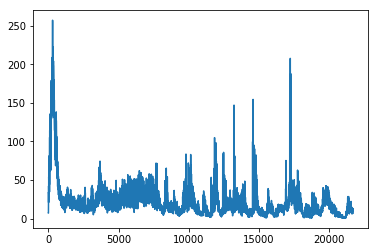

In [2]:
brain = open('data/brain_data', 'r')
brain_data = brain.read()
brain_data = brain_data.split('\t')

plt.plot([float(i) for i in brain_data[:-1]])
plt.show()